# Modelo Arima para Bitcoin

Este notebook contém o desenvolvimento do modelo **ARIMA** para o **Bitcoin**

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
# Coleta de Dados Históricos (10 anos)
btc = yf.Ticker("BTC-USD")
btc_data = btc.history(period="10y")

# Usando a coluna 'Close' para previsão
data = btc_data[["Close"]]

In [5]:
# Divisão dos Dados
split = int(len(data) * 0.8)
train_data = data.iloc[:split]
test_data = data.iloc[split:]

In [6]:
# Construção do Modelo ARIMA
# Definir os parâmetros (p, d, q) do ARIMA
p = 5 
d = 1 
q = 0 

model = ARIMA(train_data, order=(p, d, q))
arima_result = model.fit()

/home/rafa/pondm7/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/rafa/pondm7/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/rafa/pondm7/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [7]:
# Previsões para o Conjunto de Teste
predicted_prices = arima_result.forecast(steps=len(test_data))
predicted_prices = pd.Series(predicted_prices, index=test_data.index)

In [8]:
# Previsão dos próximos 30 dias
future_predictions = arima_result.forecast(steps=len(test_data) + 30)
future_predictions = pd.Series(future_predictions[-30:], 
                               index=pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D'))

In [9]:
# Cálculo das Métricas do Modelo
mse = mean_squared_error(test_data, predicted_prices)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_data, predicted_prices)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print

Mean Squared Error (MSE): 634161062.46
Root Mean Squared Error (RMSE): 25182.55


<function print>

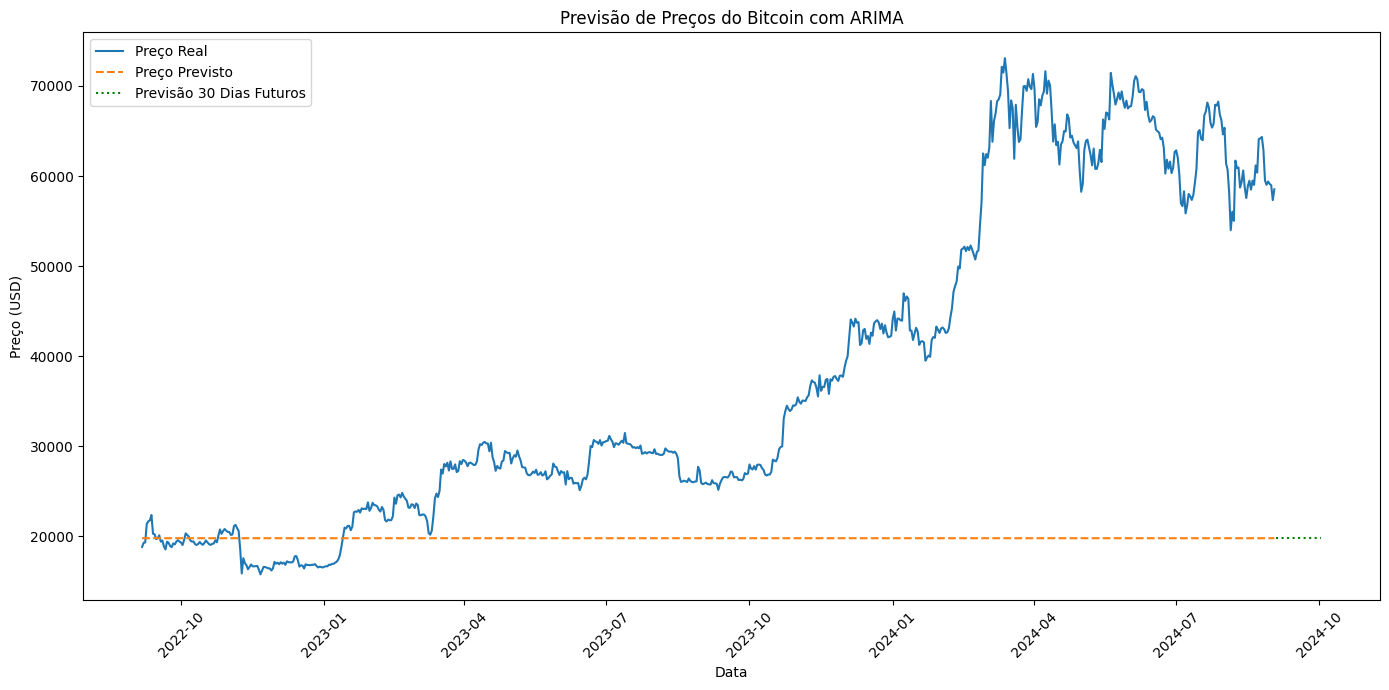

In [10]:
# Gráfico de Previsão vs Real, incluindo os próximos 30 dias
plt.figure(figsize=(14, 7))
plt.plot(test_data.index, test_data, label="Preço Real")
plt.plot(predicted_prices.index, predicted_prices, label="Preço Previsto", linestyle="--")

# Adicionar as previsões dos próximos 30 dias ao gráfico
plt.plot(
    future_predictions.index,
    future_predictions,
    label="Previsão 30 Dias Futuros",
    linestyle=":",
    color="green",
)

plt.title("Previsão de Preços do Bitcoin com ARIMA")
plt.xlabel("Data")
plt.ylabel("Preço (USD)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Identificação dos Melhores Dias para Comprar e Vender
buy_day_index = np.argmin(future_predictions)
sell_day_index = np.argmax(future_predictions)
buy_day = future_predictions.index[buy_day_index]
sell_day = future_predictions.index[sell_day_index]

print(f"Melhor dia para comprar Bitcoin: {buy_day.date()}")
print(f"Melhor dia para vender Bitcoin: {sell_day.date()}")

Melhor dia para comprar Bitcoin: 2024-09-03
Melhor dia para vender Bitcoin: 2024-09-03


/tmp/ipykernel_56911/958812334.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(buy_day, future_predictions[buy_day_index], color="green", label="Melhor Dia para Comprar", marker="^", s=100)
/tmp/ipykernel_56911/958812334.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(sell_day, future_predictions[sell_day_index], color="red", label="Melhor Dia para Vender", marker="v", s=100)


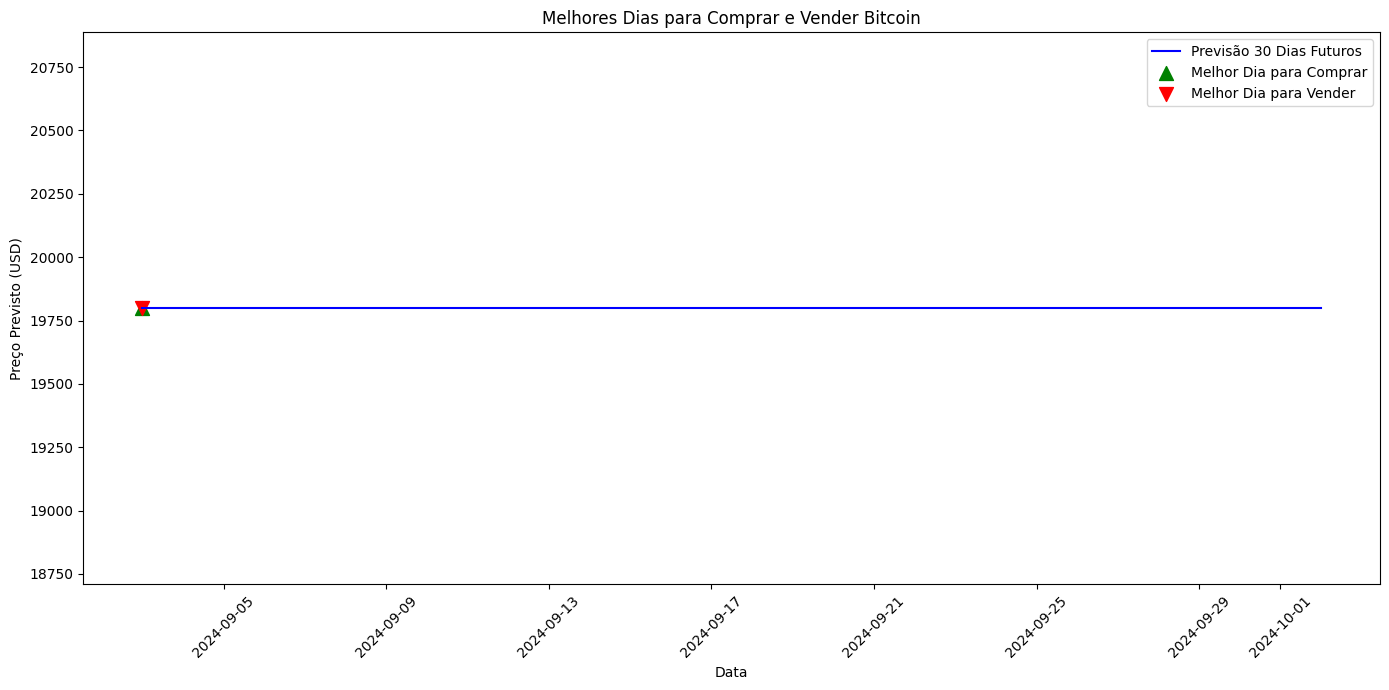

In [12]:
# Gráfico mostrando os melhores dias para compra e venda
plt.figure(figsize=(14, 7))
plt.plot(future_predictions.index, future_predictions, label="Previsão 30 Dias Futuros", color="blue")
plt.scatter(buy_day, future_predictions[buy_day_index], color="green", label="Melhor Dia para Comprar", marker="^", s=100)
plt.scatter(sell_day, future_predictions[sell_day_index], color="red", label="Melhor Dia para Vender", marker="v", s=100)
plt.title("Melhores Dias para Comprar e Vender Bitcoin")
plt.xlabel("Data")
plt.ylabel("Preço Previsto (USD)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()